In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Retrieve the Excel file from IBGE ftp

In [2]:
excel_2015 = "ftp://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2015/Tabelas_de_Resultados/xlsx/01_Pessoas_de_10_Anos_ou_Mais_de_Idade/02_Equipamento_Utlizado_para_Acessar_a_Internet.xlsx"

# Create DataFrame with the *.xlsx file

In [9]:
df = pd.read_excel(excel_2015, sheet_name='Tab 1.2.1.1 e 1.2.1.2')

In [10]:
df.head()

,"Tabela 1.2.1.1 - Pessoas de 10 anos ou mais de idade que utilizaram a Internet, no período de referência dos últimos três meses, por Grandes Regiões, segundo o equipamento utilizado para acessar a Internet - 2015",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,"Tabela 1.2.1.2 - Distribuição das pessoas de 10 anos ou mais de idade, por Grandes Regiões, segundo o equipamento utilizado para acessar a Internet - 2015",Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Equipamento utilizado para acessar a Internet,Pessoas de 10 anos ou mais de idade que utiliz...,NaN,NaN,NaN,NaN,NaN,Equipamento utilizado para acessar a Internet,Distribuição das pessoas de 10 anos ou mais de...,NaN,NaN,NaN,NaN,NaN
2,NaN,Brasil,Grandes Regiões,NaN,NaN,NaN,NaN,NaN,Brasil,Grandes Regiões,NaN,NaN,NaN,NaN
3,NaN,NaN,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,NaN,NaN,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
4,Total,102083,6715.31,21831.1,49247,15759,8530.74,Total,100,100,100,100,100,100


In [11]:
df = df[df.columns[0:7]]

In [12]:
df.head()

,"Tabela 1.2.1.1 - Pessoas de 10 anos ou mais de idade que utilizaram a Internet, no período de referência dos últimos três meses, por Grandes Regiões, segundo o equipamento utilizado para acessar a Internet - 2015",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Equipamento utilizado para acessar a Internet,Pessoas de 10 anos ou mais de idade que utiliz...,NaN,NaN,NaN,NaN,NaN
2,NaN,Brasil,Grandes Regiões,NaN,NaN,NaN,NaN
3,NaN,NaN,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
4,Total,102083,6715.31,21831.1,49247,15759,8530.74


In [13]:
df.columns = ['Label', 'Total', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
del df['Total']

In [14]:
df

,Label,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Equipamento utilizado para acessar a Internet,NaN,NaN,NaN,NaN,NaN
2,NaN,Grandes Regiões,NaN,NaN,NaN,NaN
3,NaN,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
4,Total,6715.31,21831.1,49247,15759,8530.74
5,Microcomputador,NaN,NaN,NaN,NaN,NaN
6,Utilizaram,3521.63,13576.8,37287.6,12259.3,5962.68
7,Somente microcomputador,517.152,2240.19,5381.82,2286.37,654.431
8,Não utilizaram,3193.68,8254.31,11959.4,3499.7,2568.06
9,Telefone móvel celular ou tablet,NaN,NaN,NaN,NaN,NaN


### Remove useless rows

In [15]:
df = df.drop(df.index[:5])
df = df.drop(df.index[-10:])
df

,Label,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
5,Microcomputador,NaN,NaN,NaN,NaN,NaN
6,Utilizaram,3521.63,13576.8,37287.6,12259.3,5962.68
7,Somente microcomputador,517.152,2240.19,5381.82,2286.37,654.431
8,Não utilizaram,3193.68,8254.31,11959.4,3499.7,2568.06
9,Telefone móvel celular ou tablet,NaN,NaN,NaN,NaN,NaN
10,Utilizaram,6157.44,19498.5,43615.7,13379.5,7833.77
11,Somente telefone móvel celular ou tablet,3143.93,8118.02,11609.3,3389.64,2504.24
12,Não utilizaram,557.87,2332.56,5631.32,2379.5,696.968
13,Telefone móvel celular,NaN,NaN,NaN,NaN,NaN
14,Utilizaram,6122.78,19314.8,43185.3,13221.7,7789.83


### Get all gadgets names

In [16]:
gadgets = ['Microcomputador', 'Telefone móvel celular', 'Tablet']
gadgets

['Microcomputador', 'Telefone móvel celular', 'Tablet']

### Get a List with all 'Utilizaram' values

In [17]:
df = df.dropna()
values_2015 = df[df.Label.str.contains('Utilizaram', )]
values_2015

,Label,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
6,Utilizaram,3521.63,13576.8,37287.6,12259.3,5962.68
10,Utilizaram,6157.44,19498.5,43615.7,13379.5,7833.77
14,Utilizaram,6122.78,19314.8,43185.3,13221.7,7789.83
18,Utilizaram,535.921,2786.73,8851.29,2574.58,1228.05


In [18]:
# remove the second value because we dont want 'Telefone móvel celular ou tablet' value
values_2015 = values_2015.drop(values_2015.index[1])

In [19]:
values_2015['Label'] = gadgets
values_2015

,Label,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
6,Microcomputador,3521.63,13576.8,37287.6,12259.3,5962.68
14,Telefone móvel celular,6122.78,19314.8,43185.3,13221.7,7789.83
18,Tablet,535.921,2786.73,8851.29,2574.58,1228.05


In [28]:
values_2015['Year'] = 2015
values_2015

,Label,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Year
6,Microcomputador,3521.63,13576.8,37287.6,12259.3,5962.68,2015
14,Telefone móvel celular,6122.78,19314.8,43185.3,13221.7,7789.83,2015
18,Tablet,535.921,2786.73,8851.29,2574.58,1228.05,2015


# Define a functions

In [30]:
def extract_data(excel, year):
    df = pd.read_excel(excel, sheet_name='Tab 1.2.1.1 e 1.2.1.2')
    
    df = df[df.columns[0:7]]
    df.columns = ['Label', 'Total', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
    del df['Total']
    
    df = df.drop(df.index[:5])
    df = df.drop(df.index[-10:])
    
    df = df.dropna()
    df = df[df.Label.str.contains('Utilizaram', )]
    
    df = df.drop(df.index[1])
    
    df['Label'] = gadgets
    df['Year'] = year
    
    return df

In [31]:
excel_2014 = 'ftp://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2014/Tabelas_de_Resultados/xlsx/01_Pessoas_de_10_Anos_ou_Mais_de_Idade/02_Equipamento_Utlizado_para_Acessar_a_Internet.xlsx'
df_2014 = extract_data(excel_2014, 2014)

In [32]:
excel_2013 = 'ftp://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2013/tabelas_xls/01pessoas/02equipamentos.xls'
df_2013 = extract_data(excel_2013, 2013)

# Build new DataFrame with all years and regions

In [33]:
df_concat = pd.concat([values_2015, df_2014, df_2013], ignore_index=True)

In [34]:
df_concat

,Label,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Year
0,Microcomputador,3521.63,13576.8,37287.6,12259.3,5962.68,2015
1,Telefone móvel celular,6122.78,19314.8,43185.3,13221.7,7789.83,2015
2,Tablet,535.921,2786.73,8851.29,2574.58,1228.05,2015
3,Microcomputador,4033.87,15027.8,38882.9,12663.2,6273.61,2014
4,Telefone móvel celular,5408.81,14778,33917.1,9879.79,6212.13,2014
5,Tablet,539.491,2750.51,8824.46,2351.05,1181.99,2014
6,Microcomputador,4173.65,15867,39217.2,12640.1,6446.01,2013
7,Telefone móvel celular,3438.93,7846.54,19121.2,5597.92,3360.35,2013
8,Tablet,380.538,1816.31,6208.88,1563.21,822.835,2013


Label
Microcomputador           AxesSubplot(0.125,0.125;0.775x0.755)
Tablet                    AxesSubplot(0.125,0.125;0.775x0.755)
Telefone móvel celular    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

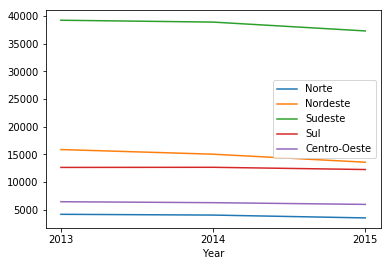

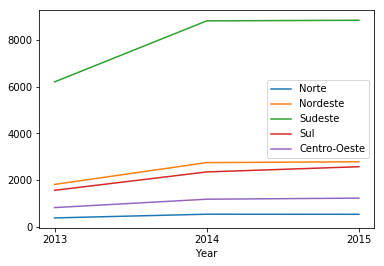

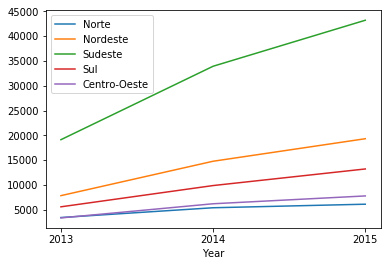

In [73]:
df_concat.groupby(['Label']).plot('Year', xticks=[2013, 2014, 2015])